In [1]:
import shap
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np 
from eli5.sklearn import PermutationImportance
shap.initjs()

In [2]:
# Read cervical cancer data
cerv = pd.read_csv("../../data/cervical.csv")
y = cerv["Biopsy"].values == "Cancer"
X = cerv.drop(["Biopsy"], axis=1)

mod = sk.ensemble.RandomForestClassifier(n_estimators = 100, random_state = 42)
mod.fit(X,y)

explainer = shap.TreeExplainer(mod, X, model_output = "margin")
shap_values = explainer.shap_values(X)

## Explain Individual Predictions

In [26]:
x = mod.predict_proba(X)[:,1]

In [30]:
np.mean(x)

0.06605891330891331

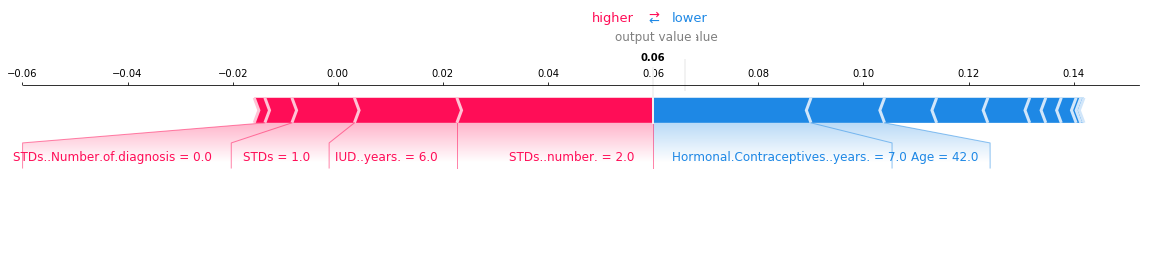

In [4]:
i = 18

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X.iloc[i,:], matplotlib = True)

In [5]:
shap_values[1][i,:]

array([-0.01398704, -0.00795613, -0.00991132, -0.00295254, -0.00282742,
       -0.00306056, -0.00975035, -0.03003594,  0.00202757,  0.01949597,
        0.01189177,  0.03734802,  0.00514691, -0.00088513, -0.00060275])

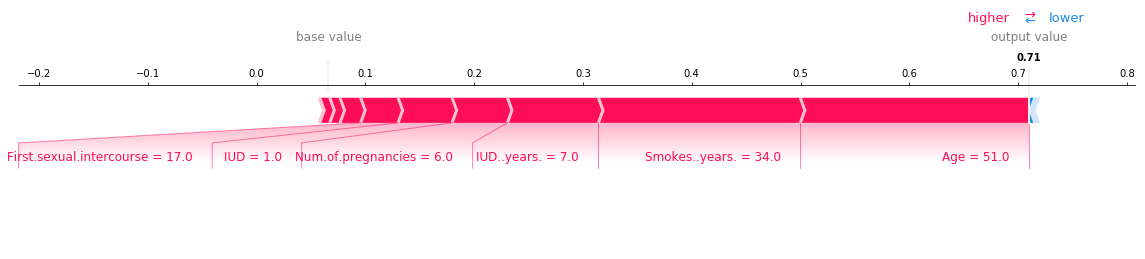

In [6]:
i = 6

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X.iloc[i,:], matplotlib = True, text_rotation = 0)

## Dependence Plots

In [7]:
cmap = plt.get_cmap("viridis", 40)
newcolors = [cmap(0.),  cmap(0.8), cmap(0.8)]
cmap2 = ListedColormap(newcolors)

In [22]:
# Feature Effect
shap.dependence_plot("Hormonal.Contraceptives..years.", shap_values[1], X, interaction_index=None, color = cmap2.colors[0])

TypeError: dependence_plot() got an unexpected keyword argument 'link'

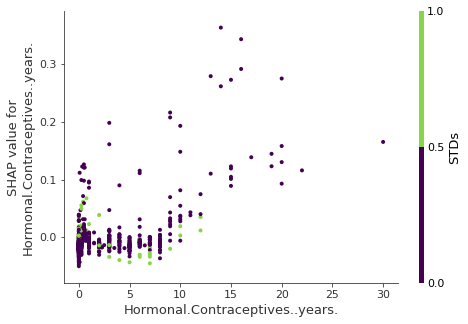

In [21]:
# Feature Effect with auto interaction detection
shap.dependence_plot("Hormonal.Contraceptives..years.", shap_values[1], X, cmap=cmap2)

## Summary Plots / Clustering

In [10]:
# Plot instance clustering
shap.force_plot(explainer.expected_value[1], shap_values[1], X)

In [31]:
shap.force_plot?

# Feature Importance

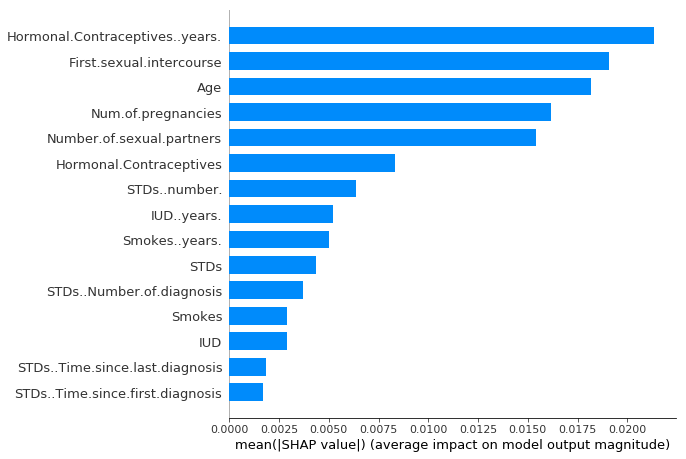

In [11]:
# Plot feature importance
shap.summary_plot(shap_values[1], X, plot_type = "bar")

Compare with permutation feature importance

In [12]:
perm = PermutationImportance(mod).fit(X, y)
eli5.explain_weights(perm)

NameError: name 'eli5' is not defined

In [ ]:
shap.summary_plot(shap_values[1], X)

In [ ]:
?shap.summary_plot

# More interactions

In [ ]:
shap_ia = explainer.shap_interaction_values(X, y)